In [1]:
ls ../data/

2004_2016_loc.csv
New_York_City_Population_By_Census_Tracts.csv
calls_with_locs.csv
census_tracts/
census_tracts.csv
chunks/
complaints.txt
complaints.txt~
geo_year/
ghcnd/
gsom/
gsom.csv
monthly_by_tract.csv
monthly_station.csv
seasonal_by_tract.csv
stations_list.csv


In [2]:
import dask.dataframe as dd
import pandas as pd

In [3]:
gsom = pd.read_csv("../data/gsom.csv")

In [4]:
stations = pd.read_csv("../data/stations_list.csv")

In [5]:
stations.columns

Index(['datacoverage', 'elevation', 'elevationUnit', 'id', 'latitude',
       'longitude', 'maxdate', 'mindate', 'name'],
      dtype='object')

In [6]:
gsomsn = gsom.merge(stations, left_on="station", right_on="id")[["date","datatype","name","value"]]

In [7]:
gsw = gsomsn.pivot_table(index='date', columns=["datatype", "name"], values="value")

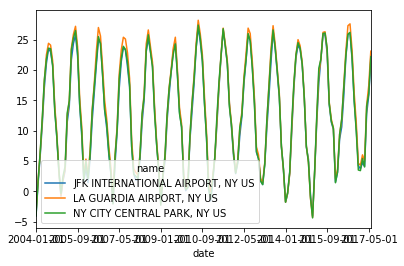

In [9]:
%matplotlib inline
gsw['TAVG'].plot()

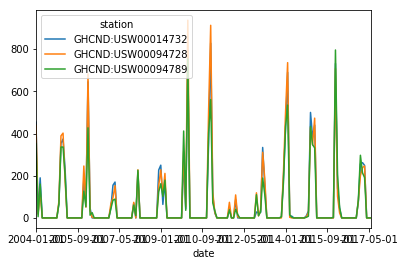

In [171]:
gsw['SNOW'].plot()

In [14]:
gsw.index = gsw.index.str[:-3]

/Users/hannah/anaconda/envs/summer/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


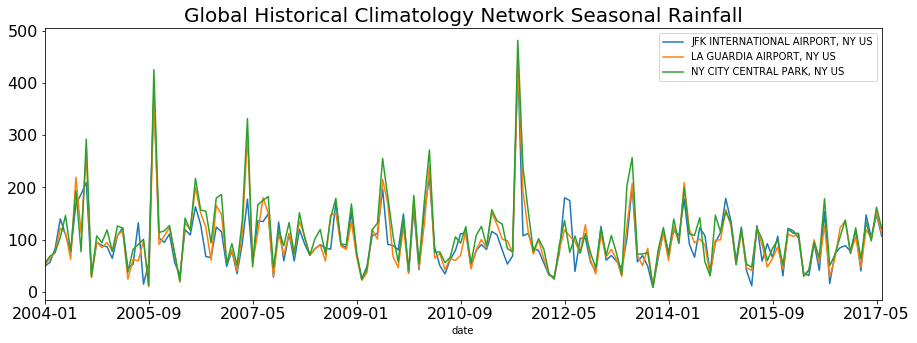

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("Global Historical Climatology Network Seasonal Rainfall", fontsize=20)
gsw['PRCP'].plot(ax=ax, fontsize=16)
ax.legend()
fig.show()